# Exercise 


In exercise foider (same level as this notebook on github)
there is hiring.cs. This file contains hiring statics for a firm 
such as experience of candidate, his written test score 
and personal interview score. Based on these 3 factors, 
HR will decide the salary. Given this data, you need to
build a machine leaming model for HR department that can help them decide
salaries for future candidates. Using this predict salaries for following 
candidates,


2 yr experience, 9 test score, 6 interview score


12 yr experience, 10 test score, 10 interview score

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
from word2number import w2n
import seaborn as sns


In [5]:
df = pd.read_csv("hiring.csv")

#filling the NaN values by Zero

df.experience = df.experience.fillna("zero")
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
df.experience = df.experience.apply(w2n.word_to_num)


In [7]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [8]:
df["test_score(out of 10)"]

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     NaN
7     7.0
Name: test_score(out of 10), dtype: float64

In [9]:
#removing the NaN value of test_score(out of 10)
import math
median_test_score = math.floor(df["test_score(out of 10)"].mean())
median_test_score

7

In [10]:
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [11]:
#creating object of linear regression model 

reg = linear_model.LinearRegression()
reg.fit(df.drop("salary($)" ,axis = "columns"),df["salary($)"])

LinearRegression()

In [12]:
reg.predict([[2,9,6]])

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [13]:
#equation : y = m1*experience + m2*test_scoure(out of 10) + m3*interview_score(out of 10) + b



In [14]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [15]:
# m1,m2,m3 = [2922.26901502, 2221.30909959, 2147.48256637]


In [16]:
reg.intercept_

14992.65144669314

In [17]:
# b = 14992.65144669314

In [18]:
#equation : y = m1*experience + m2*test_scoure(out of 10) + m3*interview_score(out of 10) + b


2922.26901502*2 + 2221.30909959*9 + 2147.48256637*6 + 14992.65144669314

53713.86677126314

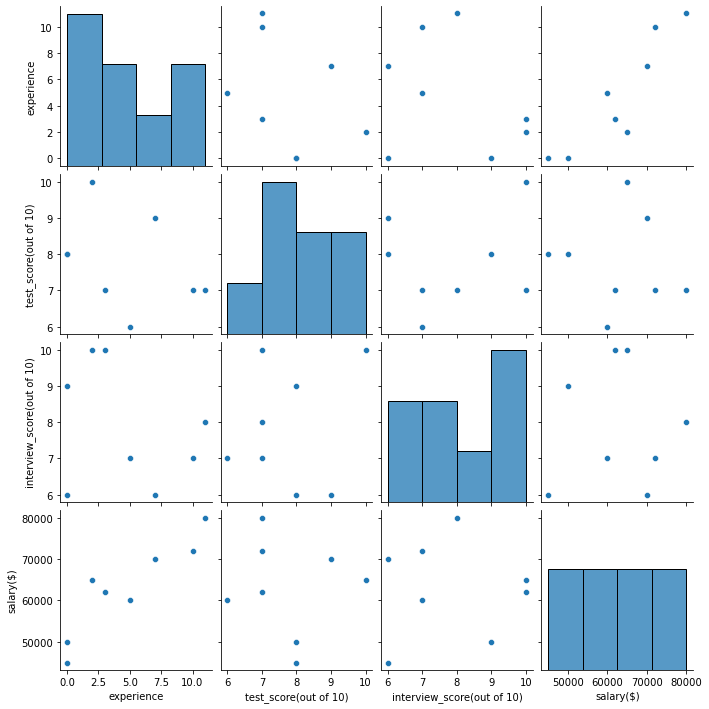

In [21]:
sns.pairplot(df)    

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary($)', ylabel='Density'>

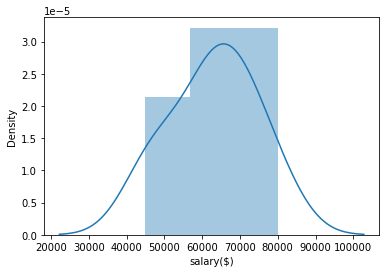

In [23]:
sns.distplot(df["salary($)"])